In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("ecommerce_sales_analysis.csv")

In [4]:
df.head(5)

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [5]:
print(df.columns)

Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12'],
      dtype='object')


In [6]:
df.shape

(1000, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [8]:
df.dtypes

product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object

In [9]:
df.drop('product_name', axis=1, inplace=True)

In [10]:
df.drop('product_id', axis=1, inplace=True)

In [11]:
df.head(2)

,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,Clothing,190.4,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,Home & Kitchen,475.6,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353


In [12]:
df.isnull().values.any()

False

In [13]:
df.isnull().sum()

category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [14]:
#Sales by Category 

In [17]:
sales_by_category = df.groupby("category")[["sales_month_1", "sales_month_2","sales_month_3", "sales_month_4","sales_month_5", "sales_month_6","sales_month_7", "sales_month_8","sales_month_9", "sales_month_10","sales_month_11", "sales_month_12"]].sum().sum(axis=1)


C:\Users\Alexa\AppData\Local\Temp\ipykernel_13596\446338241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="viridis")


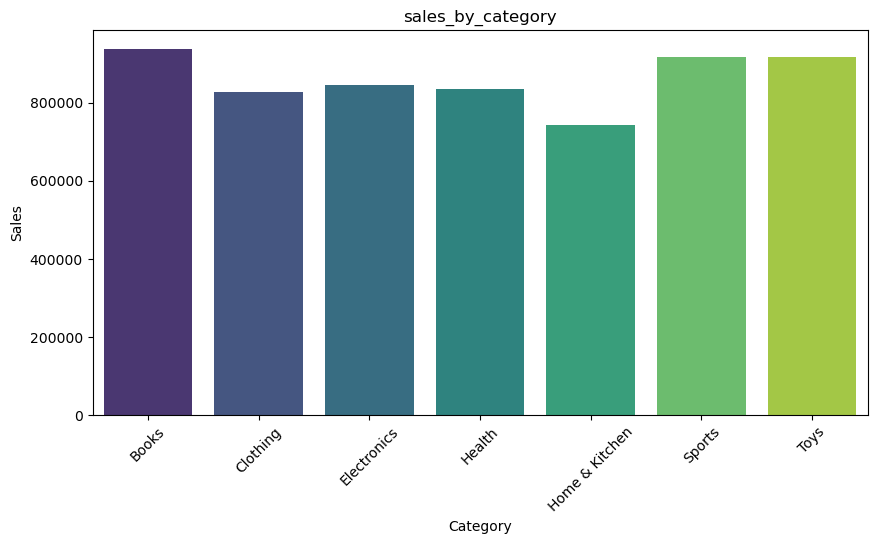

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("sales_by_category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()


📌 Qual categoria gera mais receita?
📌 Quais categorias são menos populares?
📌 Se alguma categoria tem crescimento sazonal


In [19]:
sales_by_month = df.iloc[:, 4:].sum()

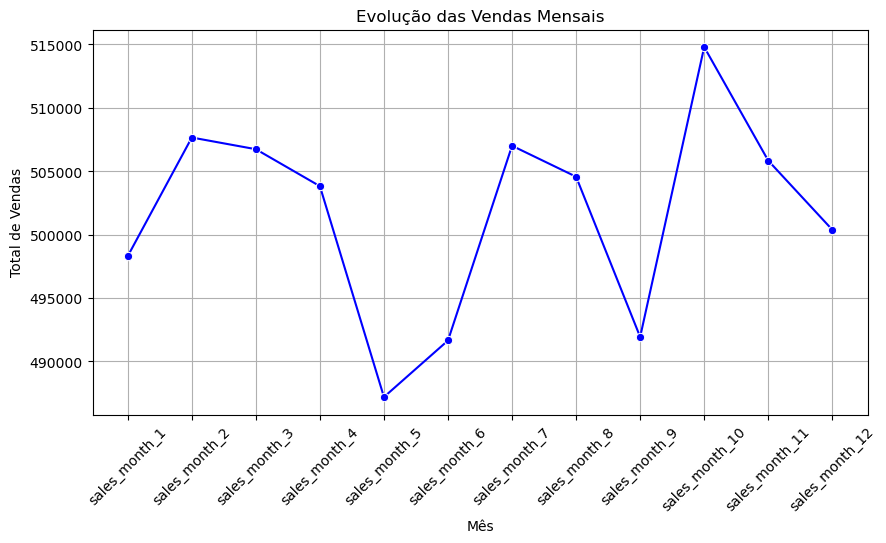

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Evolução das Vendas Mensais")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


📌 Existe um aumento nas vendas próximo a datas sazonais (Natal, Black Friday)?
📌 O crescimento é constante ou há períodos de queda?
Objetivo: Mostrar se existe correlação entre o preço do produto e a avaliação dos clientes.

In [21]:
print(df.columns)

Index(['category', 'price', 'review_score', 'review_count', 'sales_month_1',
       'sales_month_2', 'sales_month_3', 'sales_month_4', 'sales_month_5',
       'sales_month_6', 'sales_month_7', 'sales_month_8', 'sales_month_9',
       'sales_month_10', 'sales_month_11', 'sales_month_12'],
      dtype='object')


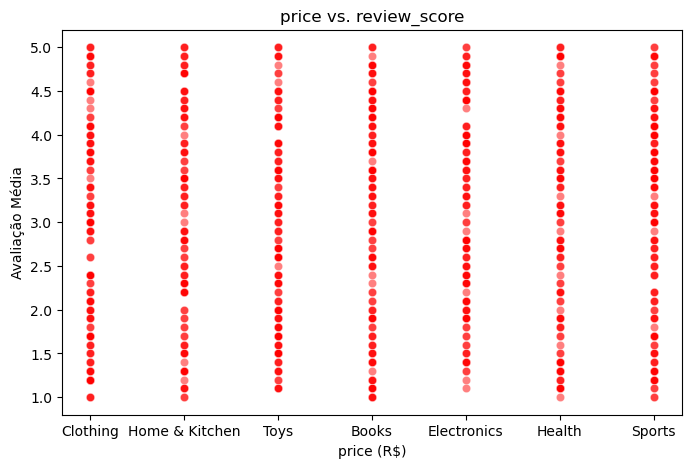

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["category"], y=df["review_score"], alpha=0.5, color="red")
plt.title("price vs. review_score")
plt.xlabel("price (R$)")
plt.ylabel("Avaliação Média")
plt.show()


## Outliers 

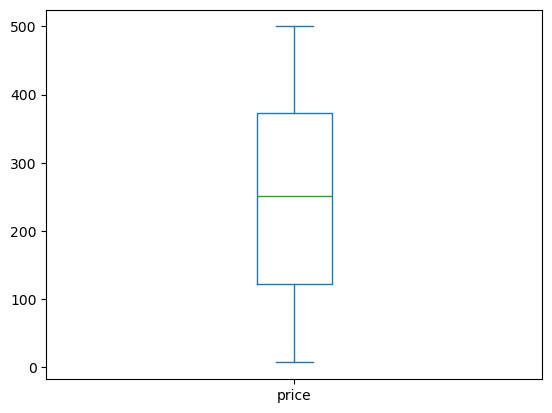

In [13]:
df['price'].plot.box()
plt.show()

In [14]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [15]:
outliers = df[(df['price'] < lower_limit) | (df['price'] > upper_limit)]
print(outliers)

Empty DataFrame
Columns: [category, price, review_score, review_count, sales_month_1, sales_month_2, sales_month_3, sales_month_4, sales_month_5, sales_month_6, sales_month_7, sales_month_8, sales_month_9, sales_month_10, sales_month_11, sales_month_12]
Index: []


In [16]:
from scipy.stats import zscore

In [17]:
df['z_score_review'] = zscore(df['review_score'])

In [18]:
review_outliers = df[df['z_score_review'].abs() > 3]
print(review_outliers)

Empty DataFrame
Columns: [category, price, review_score, review_count, sales_month_1, sales_month_2, sales_month_3, sales_month_4, sales_month_5, sales_month_6, sales_month_7, sales_month_8, sales_month_9, sales_month_10, sales_month_11, sales_month_12, z_score_review]
Index: []


In [19]:
lower_bound = df['review_count'].quantile(0.05)
upper_bound = df['review_count'].quantile(0.95)

In [20]:
count_outliers = df[(df['review_count'] < lower_bound) | (df['review_count'] > upper_bound)]
print(count_outliers)

           category   price  review_score  review_count  sales_month_1  \
3              Toys  301.34           3.9           951            725   
11           Health  485.11           5.0           991            276   
31         Clothing   89.41           3.4           987            541   
33             Toys  474.70           1.5            70            578   
36   Home & Kitchen  155.78           2.4           978             24   
..              ...     ...           ...           ...            ...   
963           Books  197.70           2.5           949            783   
964  Home & Kitchen  147.90           3.3           974            594   
968          Health  285.37           2.3           947            463   
975     Electronics  134.82           4.8            48            564   
993  Home & Kitchen  297.16           1.5            13             49   

     sales_month_2  sales_month_3  sales_month_4  sales_month_5  \
3              678             59           

In [21]:
df_cleaned = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]
print(df_cleaned)

           category   price  review_score  review_count  sales_month_1  \
0          Clothing  190.40           1.7           220            479   
1    Home & Kitchen  475.60           3.2           903             21   
2              Toys  367.34           4.5           163            348   
3              Toys  301.34           3.9           951            725   
4             Books   82.23           4.2           220            682   
..              ...     ...           ...           ...            ...   
995  Home & Kitchen   50.33           3.6           494            488   
996  Home & Kitchen  459.07           4.8           701             18   
997          Sports   72.73           1.3           287            725   
998          Sports  475.37           1.2           720            196   
999            Toys  225.77           2.1           114            890   

     sales_month_2  sales_month_3  sales_month_4  sales_month_5  \
0              449             92           

In [22]:
count_outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(count_outliers)

           category  price  review_score  review_count  sales_month_1  \
6       Electronics  33.75           3.8           632            565   
10             Toys  15.19           1.9           182            125   
29            Books  27.99           4.3           690            487   
32         Clothing  37.20           1.9           519            646   
37           Sports  53.35           3.9           672            548   
..              ...    ...           ...           ...            ...   
974  Home & Kitchen  20.44           2.2           163            125   
977          Sports  30.46           2.7           329            900   
982  Home & Kitchen  57.77           2.8           337             96   
983  Home & Kitchen  42.19           2.9           881            516   
995  Home & Kitchen  50.33           3.6           494            488   

     sales_month_2  sales_month_3  sales_month_4  sales_month_5  \
6              140            539            244        

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [24]:
df.head(1)

,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,z_score_review
0,Clothing,190.4,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,-1.134064


In [25]:
df['total_sales'] = df[[f'sales_month_{i}' for i in range(1, 13)]].sum(axis=1)

In [26]:
category_sales = df.groupby('category')['total_sales'].sum()

In [27]:
most_sold_category = category_sales.idxmax() 
most_sold_sales = category_sales.max()       

In [28]:
print(f"most sold category: {most_sold_category} with {most_sold_sales} Sales.")

most sold category: Books with 938229 Sales.


In [29]:
category_sales_sorted = category_sales.sort_values(ascending=False)

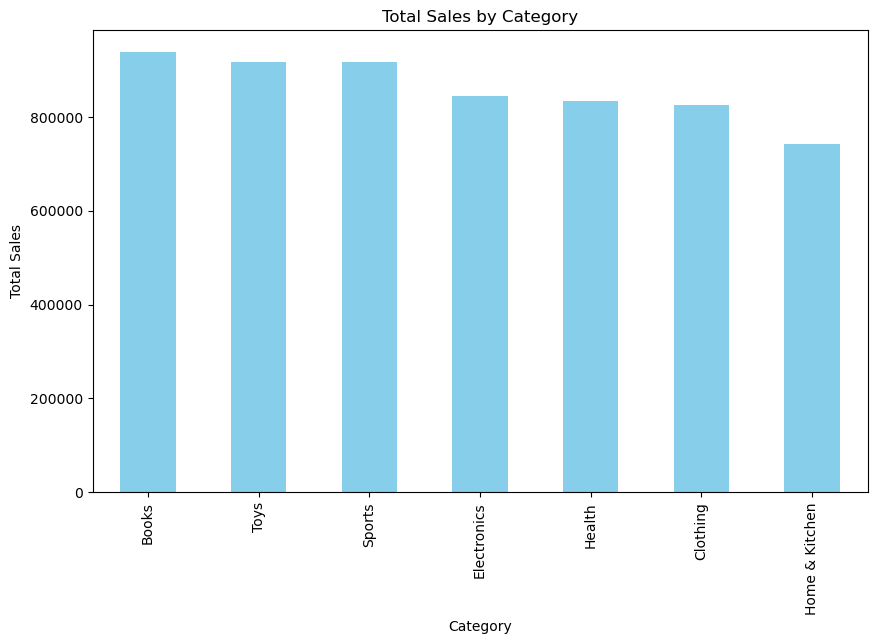

In [30]:
category_sales_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

In [31]:
df['total_sales'] = df[[f'sales_month_{i}' for i in range(1, 13)]].sum(axis=1)

In [32]:
reviews_by_category = df.groupby('category').agg(
    total_reviews=('review_count', 'sum'),
    avg_review_score=('review_score', 'mean'),
    total_sales=('total_sales', 'sum')
)

In [33]:
reviews_by_category['reviews_per_sale'] = reviews_by_category['total_reviews'] / reviews_by_category['total_sales']

In [34]:
reviews_by_category = reviews_by_category.sort_values(by='reviews_per_sale', ascending=False)

In [35]:
print(reviews_by_category)

                total_reviews  avg_review_score  total_sales  reviews_per_sale
category                                                                      
Sports                  83726          3.091503       916371          0.091367
Home & Kitchen          67735          3.035200       742141          0.091270
Electronics             73862          3.143478       845120          0.087398
Health                  72398          3.005036       834414          0.086765
Toys                    79175          2.870861       917101          0.086332
Clothing                70347          2.952143       826536          0.085111
Books                   79263          3.096753       938229          0.084482


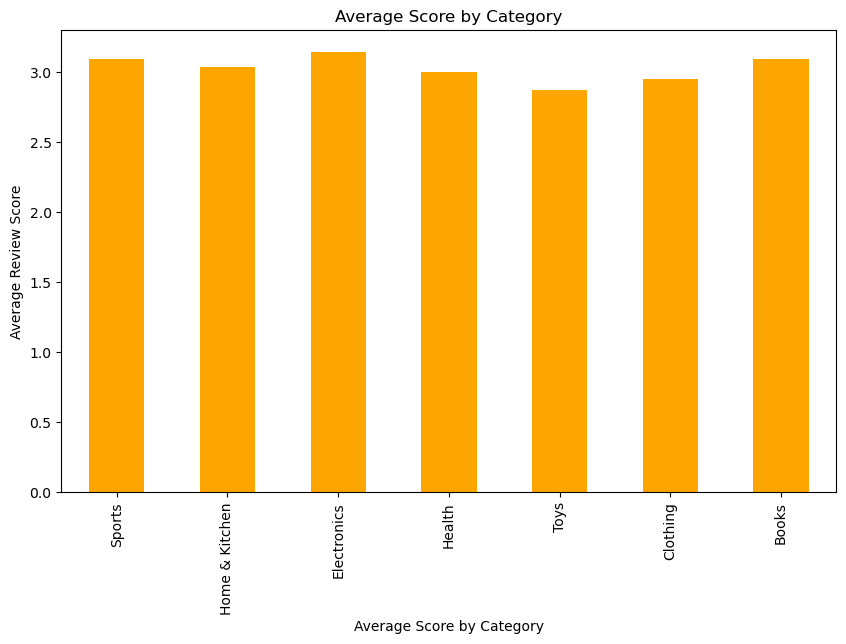

In [36]:
reviews_by_category['avg_review_score'].plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average Score by Category')
plt.xlabel('Average Score by Category')
plt.ylabel('Average Review Score')
plt.show()

Random forest 

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
df.head()

,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,z_score_review,total_sales
0,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,-1.134064,6421
1,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,0.147268,6027
2,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,1.257755,5580
3,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,0.745222,5022
4,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,1.001489,6094


In [39]:
df_books = df[df['category'] == 'Books']

In [40]:
df_books['total_next_year_sales'] = (
    df_books[['sales_month_1', 'sales_month_2', 'sales_month_3', 
               'sales_month_4', 'sales_month_5', 'sales_month_6']].sum(axis=1)
)

In [41]:
features = ['price', 'review_score', 'review_count', 
            'sales_month_1', 'sales_month_2', 'sales_month_3', 
            'sales_month_4', 'sales_month_5', 'sales_month_6']
target = 'total_next_year_sales'


In [42]:
X = df_books[features]
y = df_books[target]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_pred = model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 134892.25
Mean Absolute Error (MAE): 299.33


In [47]:
importances = model.feature_importances_
print("Features importances:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.2f}")

Features importances:
price: 0.02
review_score: 0.02
review_count: 0.02
sales_month_1: 0.12
sales_month_2: 0.13
sales_month_3: 0.14
sales_month_4: 0.15
sales_month_5: 0.21
sales_month_6: 0.19


In [48]:
new_product = pd.DataFrame({
    'price': [35], 
    'review_score': [4.5], 
    'review_count': [120], 
    'sales_month_1': [500], 
    'sales_month_2': [550], 
    'sales_month_3': [600], 
    'sales_month_4': [650], 
    'sales_month_5': [700], 
    'sales_month_6': [750]
})
predict = model.predict(new_product)
print(f"Next Year Sales New Product: {predict[0]:.2f}")

Next Year Sales New Product: 3558.53


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
correlation_matrix = df[['price', 'review_score', 'review_count', 
                         'sales_month_1', 'sales_month_2', 'sales_month_3', 
                         'sales_month_4', 'sales_month_5', 'sales_month_6']].corr()

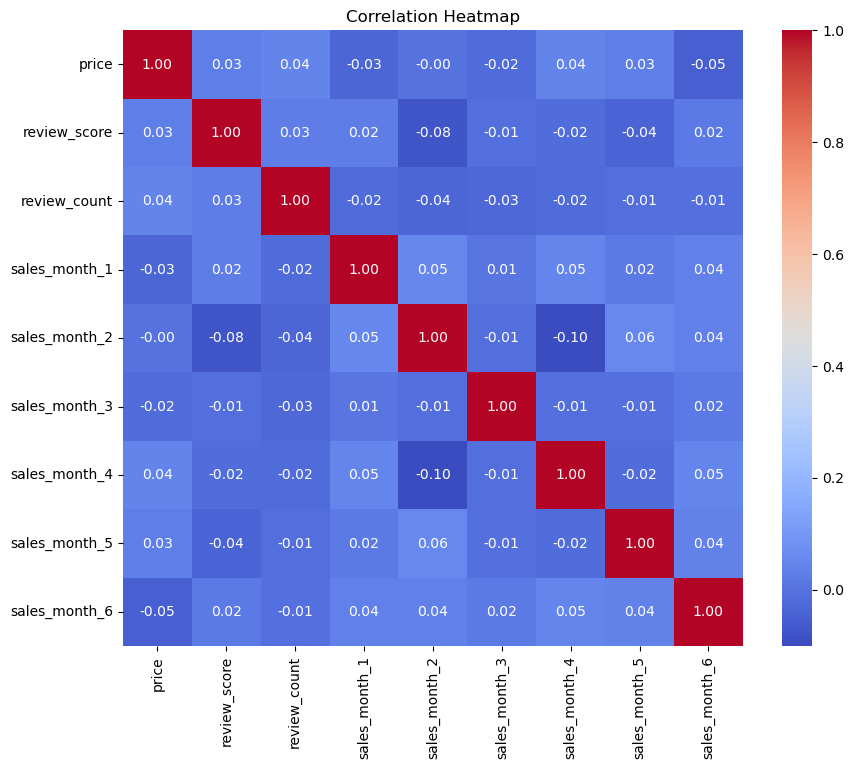

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()